In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#preproccesing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,f1_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Functions

In [2]:
def load(path):
    images = [path + i for i in os.listdir(path)]
    im = cv2.imread(images[0])
    if im is not None:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        img = im
        plt.imshow(img)
    else:
        print("Failed to load image:", images[0])
    return images

def toList(images_list, labels_list, images, label):
    for i in images:
        img = cv2.imread(i)
        if img is not None:
            img = cv2.resize(img, (50,50))
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images_list.append(pd.Series(img.flatten())) #used flatten method
            labels_list.append(label)
    

## Loading Data

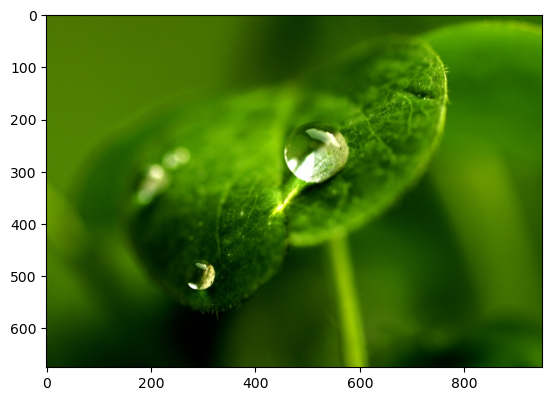

In [3]:
#dew
dew_images = load(r'C:\Users\talia\MachineLearning\dataset\dew/')

In [4]:
images = []
labels = []
 
toList(images, labels, dew_images, 'dew')

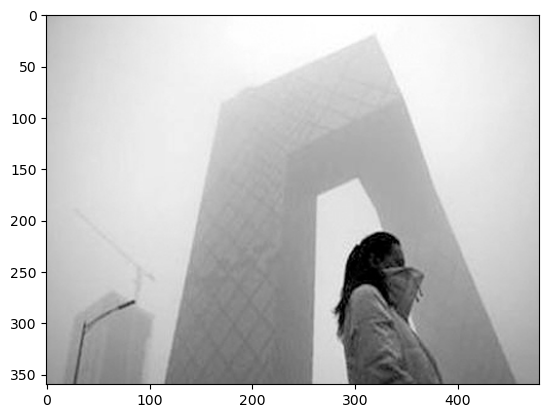

In [5]:
#fogsmog
fogsmog_images = load(r'C:\Users\talia\MachineLearning\dataset\fogsmog/')

In [6]:
toList(images, labels, fogsmog_images, 'fogsmog')

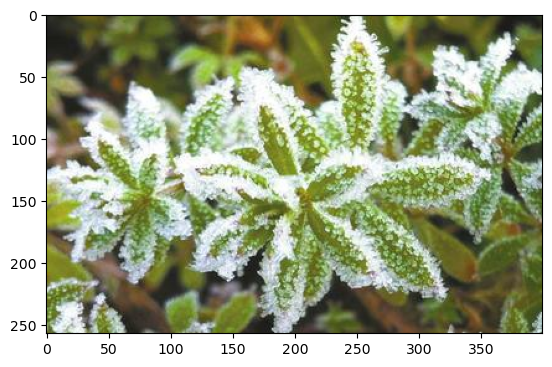

In [7]:
#frost
frost_images = load(r'C:\Users\talia\MachineLearning\dataset\frost/')

In [8]:
toList(images, labels, frost_images, 'frost')

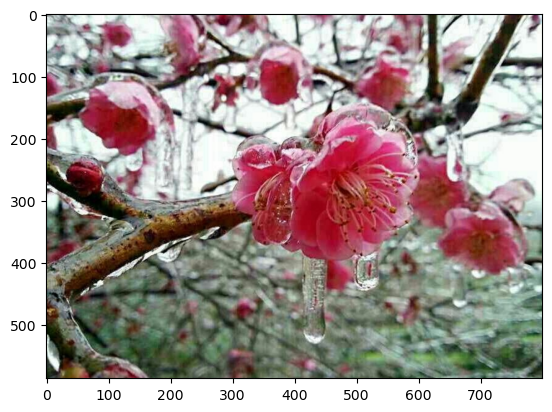

In [9]:
#glaze
glaze_images = load(r'C:\Users\talia\MachineLearning\dataset\glaze/')

In [10]:
toList(images, labels, glaze_images, 'glaze')

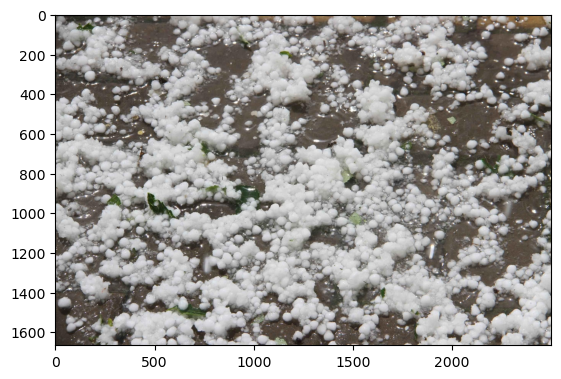

In [11]:
#hail
hail_images = load(r'C:\Users\talia\MachineLearning\dataset\hail/')

In [12]:
toList(images, labels, hail_images, 'hail')

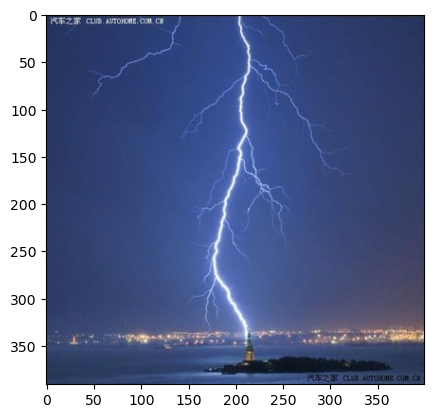

In [13]:
#lightning
lightning_images = load(r'C:\Users\talia\MachineLearning\dataset\lightning/')

In [14]:
toList(images, labels, lightning_images, 'lightning')

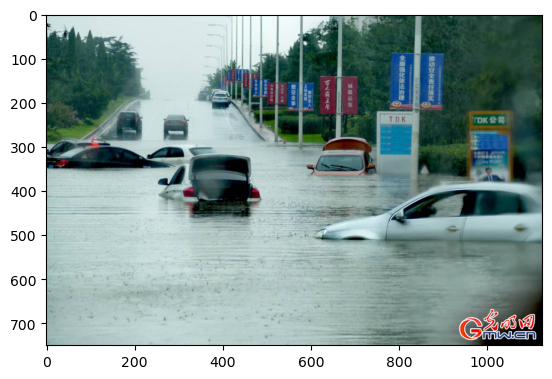

In [15]:
#rain
rain_images = load(r'C:\Users\talia\MachineLearning\dataset\rain/')

In [16]:
toList(images, labels, rain_images, 'rain')

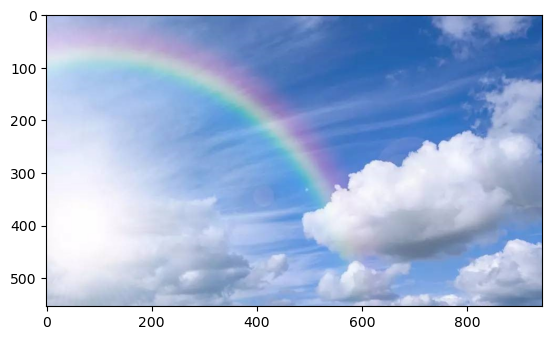

In [17]:
#rainbow
rainbow_images = load(r'C:\Users\talia\MachineLearning\dataset\rainbow/')

In [18]:
toList(images, labels, rainbow_images, 'rainbow')

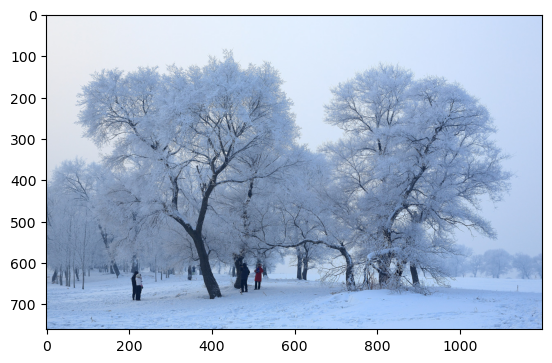

In [19]:
#rime
rime_images = load(r'C:\Users\talia\MachineLearning\dataset\rime/')

In [20]:
toList(images, labels, rime_images, 'rime')

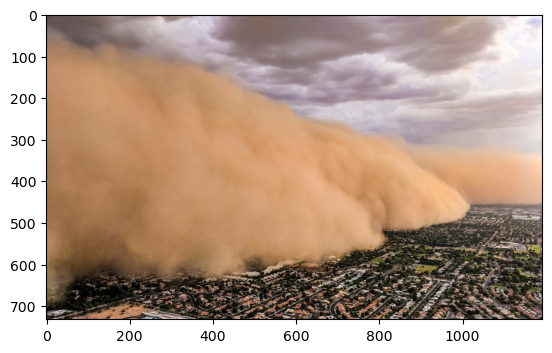

In [21]:
#sandstorm
sandstorm_images = load(r'C:\Users\talia\MachineLearning\dataset\sandstorm/')

In [22]:
toList(images, labels, sandstorm_images, 'sandstorm')

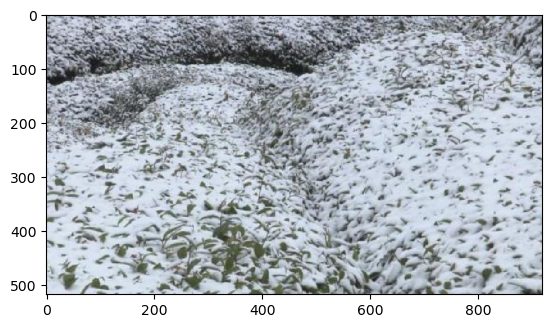

In [23]:
#snow
snow_images = load(r'C:\Users\talia\MachineLearning\dataset\snow/')

In [24]:
toList(images, labels, snow_images, 'snow')

## Visualization

In [26]:
images_df = pd.DataFrame(images)
images_df

0     1     2     3     4     5     6     7     8     9     ...  7490  \
0        1   119    76     1   116    76     0   118    75     2  ...    25   
1       29    51    39    35    59    47    32    56    44    28  ...    80   
2        8    58    38    45   106    78    30    77    54    12  ...     1   
3        0    16     0     0    21     0     1    26     0     0  ...     1   
4      228   227   213   217   217   201   230   228   217   226  ...   207   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
6855    89    80    78   132   122   122   112   102   102   143  ...   133   
6856    80    38    15    80    38    15    80    38    15    77  ...    13   
6857   198   165   141   191   159   132   209   169   144   208  ...   142   
6858     9     9     9    10    10    10    12    12    12    13  ...    45   
6859   220   206   204   189   172   169   208   185   183   211  ...    81   

      7491  7492  7493  7494  7495  7496  7497  7498  7499  
0        0    79    22     0    90    34     0   112    54  
1       70   104    75    76   111    84    60    96    66  
2        5     0     1     5     0     1     5     0     1  
3        2    51     1     2    51     1     1    52     2  
4      223   220   210   210   210   196   212   204   191  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
6855    98   100    94   125   125   119    85    87    88  
6856    47    31    19    44    29    14    57    38    23  
6857    18    33    28    67    79    87    38    57    58  
6858    52    63    61    38    49    39    49    60    50  
6859    69    67    69    77    79    80    89    86    88  

[6860 rows x 7500 columns]

In [27]:
labels_df = pd.DataFrame(labels, columns=['labels'])
labels_df

labels
0       dew
1       dew
2       dew
3       dew
4       dew
...     ...
6855   snow
6856   snow
6857   snow
6858   snow
6859   snow

[6860 rows x 1 columns]

In [29]:
target_counts = labels_df['labels'].value_counts()
target_counts

rime         1160
fogsmog       850
dew           698
sandstorm     692
glaze         639
snow          620
hail          591
rain          526
frost         475
lightning     377
rainbow       232
Name: labels, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'dew'),
  Text(1, 0, 'fogsmog'),
  Text(2, 0, 'frost'),
  Text(3, 0, 'glaze'),
  Text(4, 0, 'hail'),
  Text(5, 0, 'lightning'),
  Text(6, 0, 'rain'),
  Text(7, 0, 'rainbow'),
  Text(8, 0, 'rime'),
  Text(9, 0, 'sandstorm'),
  Text(10, 0, 'snow')])

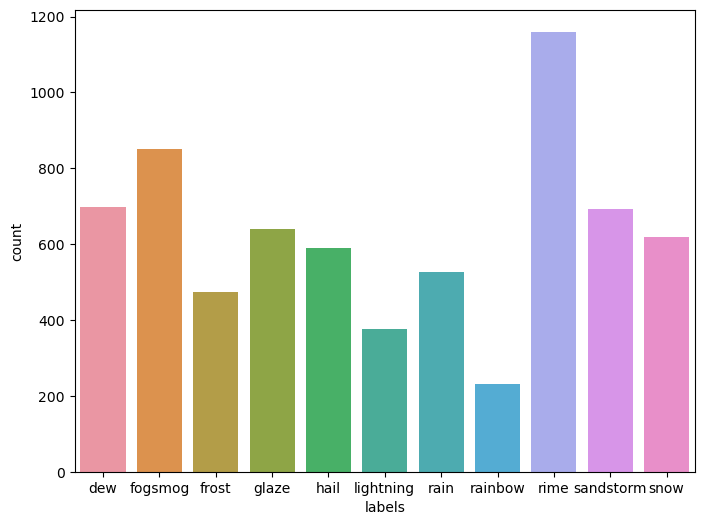

In [31]:
l = labels_df["labels"]
plt.figure(figsize = (8,6))
sns.countplot(l)
plt.xticks()

In [32]:
data_df = pd.concat([images_df, labels_df], axis=1)
data_df

0    1    2    3    4    5    6    7    8    9  ...  7491  7492  7493  \
0       1  119   76    1  116   76    0  118   75    2  ...     0    79    22   
1      29   51   39   35   59   47   32   56   44   28  ...    70   104    75   
2       8   58   38   45  106   78   30   77   54   12  ...     5     0     1   
3       0   16    0    0   21    0    1   26    0    0  ...     2    51     1   
4     228  227  213  217  217  201  230  228  217  226  ...   223   220   210   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
6855   89   80   78  132  122  122  112  102  102  143  ...    98   100    94   
6856   80   38   15   80   38   15   80   38   15   77  ...    47    31    19   
6857  198  165  141  191  159  132  209  169  144  208  ...    18    33    28   
6858    9    9    9   10   10   10   12   12   12   13  ...    52    63    61   
6859  220  206  204  189  172  169  208  185  183  211  ...    69    67    69   

      7494  7495  7496  7497  7498  7499  labels  
0        0    90    34     0   112    54     dew  
1       76   111    84    60    96    66     dew  
2        5     0     1     5     0     1     dew  
3        2    51     1     1    52     2     dew  
4      210   210   196   212   204   191     dew  
...    ...   ...   ...   ...   ...   ...     ...  
6855   125   125   119    85    87    88    snow  
6856    44    29    14    57    38    23    snow  
6857    67    79    87    38    57    58    snow  
6858    38    49    39    49    60    50    snow  
6859    77    79    80    89    86    88    snow  

[6860 rows x 7501 columns]

## preprocessing of data

In [35]:
# Split the training dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_df, labels_df, test_size=0.3, random_state=42)
# Split the test dataset into test and validation sets
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the test set: ", len(X_test))
print("Number of samples in the validation set: ", len(X_valid))

Number of samples in the train set:  4802
Number of samples in the test set:  1029
Number of samples in the validation set:  1029


In [38]:
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [40]:
# Normalization
X_train /=255.
X_valid /=255.
X_test /=255.

### PCA

In [41]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [46]:
pca = PCA(n_components = 0.97)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_valid)

In [47]:
pca.n_components_

1110

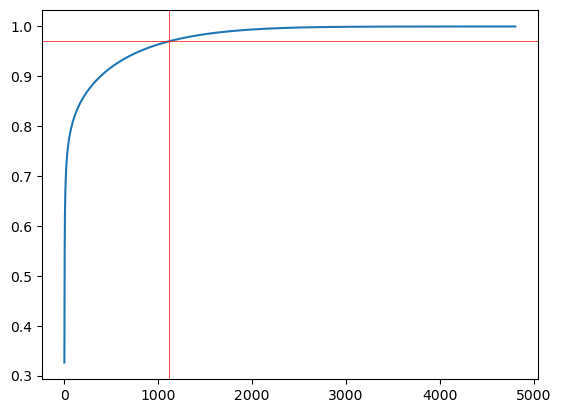

In [49]:
plt.plot(cumsum)
plt.axhline(y=0.97, linewidth=0.5, color='r');
plt.axvline(x=1110, linewidth=0.5, color='r');

# Modeling